In [102]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [103]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [104]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [105]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df = pd.read_csv('MoviesOnStreamingPlatforms.csv')
print(df.dtypes)
print(df.describe(include='all'))

Unnamed: 0          int64
ID                  int64
Title              object
Year                int64
Age                object
Rotten Tomatoes    object
Netflix             int64
Hulu                int64
Prime Video         int64
Disney+             int64
Type                int64
dtype: object
         Unnamed: 0           ID         Title         Year   Age  \
count   9515.000000  9515.000000          9515  9515.000000  5338   
unique          NaN          NaN          9515          NaN     5   
top             NaN          NaN  The Irishman          NaN   18+   
freq            NaN          NaN             1          NaN  2276   
mean    4757.000000  4758.000000           NaN  2007.422386   NaN   
std     2746.888239  2746.888239           NaN    19.130367   NaN   
min        0.000000     1.000000           NaN  1914.000000   NaN   
25%     2378.500000  2379.500000           NaN  2006.000000   NaN   
50%     4757.000000  4758.000000           NaN  2015.000000   NaN   
75%     71

In [107]:
df.replace("?", np.nan, inplace = True)

In [108]:
missing_data = df.isnull()
missing_data.head()

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [109]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Unnamed: 0
Unnamed: 0
False    9515
Name: count, dtype: int64

ID
ID
False    9515
Name: count, dtype: int64

Title
Title
False    9515
Name: count, dtype: int64

Year
Year
False    9515
Name: count, dtype: int64

Age
Age
False    5338
True     4177
Name: count, dtype: int64

Rotten Tomatoes
Rotten Tomatoes
False    9508
True        7
Name: count, dtype: int64

Netflix
Netflix
False    9515
Name: count, dtype: int64

Hulu
Hulu
False    9515
Name: count, dtype: int64

Prime Video
Prime Video
False    9515
Name: count, dtype: int64

Disney+
Disney+
False    9515
Name: count, dtype: int64

Type
Type
False    9515
Name: count, dtype: int64



In [110]:
# Handling missing values in Age
df['Age'] = df['Age'].map({'18+': 1, '7+': 2, '13+': 3, '16+': 4, 'all': 5})
imputer = KNNImputer(n_neighbors=10)
df[['Age']] = imputer.fit_transform(df[['Age']])
df['Age'].tail(20)

9495    4.000000
9496    2.256276
9497    2.256276
9498    2.256276
9499    2.000000
9500    2.256276
9501    2.256276
9502    2.256276
9503    4.000000
9504    2.256276
9505    2.000000
9506    2.256276
9507    3.000000
9508    3.000000
9509    2.256276
9510    2.256276
9511    2.256276
9512    2.256276
9513    2.256276
9514    2.000000
Name: Age, dtype: float64

In [111]:
# Round Age values to ensure they are integers
df['Age'] = df['Age'].round().astype(int)

# Ensure Age contains only the intended values (1, 2, 3, 4, 5)
valid_age_values = [1, 2, 3, 4, 5]
df = df[df['Age'].isin(valid_age_values)]

In [112]:
# Handling missing values in Rotten Tomatoes scores
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].astype(str)
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.split('/').str[0].astype(float)
imputer = KNNImputer(n_neighbors=10)
df['Rotten Tomatoes'] = imputer.fit_transform(df[['Rotten Tomatoes']])
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].round().astype('int64')
df['Rotten Tomatoes'].tail(20)

9495    33
9496    33
9497    33
9498    33
9499    32
9500    32
9501    31
9502    16
9503    16
9504    15
9505    14
9506    14
9507    14
9508    14
9509    14
9510    14
9511    13
9512    13
9513    10
9514    10
Name: Rotten Tomatoes, dtype: int64

In [113]:
# Check missing values
print("Missing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Unnamed: 0         0
ID                 0
Title              0
Year               0
Age                0
Rotten Tomatoes    0
Netflix            0
Hulu               0
Prime Video        0
Disney+            0
Type               0
dtype: int64


In [114]:
# Check last 10 rows of df
df.tail(10)

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
9505,9505,9506,Great Shark Chow Down,2019,2,14,0,0,0,1,0
9506,9506,9507,In Beaver Valley,1950,2,14,0,0,0,1,0
9507,9507,9508,Texas Storm Squad,2020,3,14,0,0,0,1,0
9508,9508,9509,What the Shark?,2020,3,14,0,0,0,1,0
9509,9509,9510,Built for Mars: The Perseverance Rover,2021,2,14,0,0,0,1,0
9510,9510,9511,Most Wanted Sharks,2020,2,14,0,0,0,1,0
9511,9511,9512,Doc McStuffins: The Doc Is In,2020,2,13,0,0,0,1,0
9512,9512,9513,Ultimate Viking Sword,2019,2,13,0,0,0,1,0
9513,9513,9514,Hunt for the Abominable Snowman,2011,2,10,0,0,0,1,0
9514,9514,9515,Women of Impact: Changing the World,2019,2,10,0,0,0,1,0


In [115]:
# The columns to keep
columns_to_keep = ['ID', 'Title', 'Year', 'Age', 'Rotten Tomatoes', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type']

# Drop all columns except the ones to keep
df = df[columns_to_keep]
df.tail(10)

,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
9505,9506,Great Shark Chow Down,2019,2,14,0,0,0,1,0
9506,9507,In Beaver Valley,1950,2,14,0,0,0,1,0
9507,9508,Texas Storm Squad,2020,3,14,0,0,0,1,0
9508,9509,What the Shark?,2020,3,14,0,0,0,1,0
9509,9510,Built for Mars: The Perseverance Rover,2021,2,14,0,0,0,1,0
9510,9511,Most Wanted Sharks,2020,2,14,0,0,0,1,0
9511,9512,Doc McStuffins: The Doc Is In,2020,2,13,0,0,0,1,0
9512,9513,Ultimate Viking Sword,2019,2,13,0,0,0,1,0
9513,9514,Hunt for the Abominable Snowman,2011,2,10,0,0,0,1,0
9514,9515,Women of Impact: Changing the World,2019,2,10,0,0,0,1,0


In [116]:
# Prepare data for regression
X = df[['Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Year', 'Age']]
y = df['Rotten Tomatoes']

In [117]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [118]:
# Fit linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [119]:
# Make predictions
y_pred = lm.predict(X_test)


In [120]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Coefficients: {lm.coef_}')
print(f'Intercept: {lm.intercept_}')

Mean Squared Error: 160.77475670660752
R-squared: 0.07771846912213498
Coefficients: [ 6.43833637e+00  1.22234454e+01  2.24492334e+00  1.15013547e+01
 -7.76161430e-04 -5.75693990e-01]
Intercept: 50.36730400741265


In [121]:
# Print coefficients and their corresponding features
coefficients = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

             Coefficient
Netflix         6.438336
Hulu           12.223445
Prime Video     2.244923
Disney+        11.501355
Year           -0.000776
Age            -0.575694


In [122]:
# Calculate Pearson correlation coefficients
pearson_corr_platforms = df[['Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Age', 'Rotten Tomatoes']].corr()['Rotten Tomatoes'].drop('Rotten Tomatoes')
print("Pearson Correlation Coefficients between Streaming Platforms, Age, and Rotten Tomatoes Ratings:")
print(pearson_corr_platforms)

Pearson Correlation Coefficients between Streaming Platforms, Age, and Rotten Tomatoes Ratings:
Netflix        0.054464
Hulu           0.182635
Prime Video   -0.208128
Disney+        0.118365
Age           -0.002720
Name: Rotten Tomatoes, dtype: float64


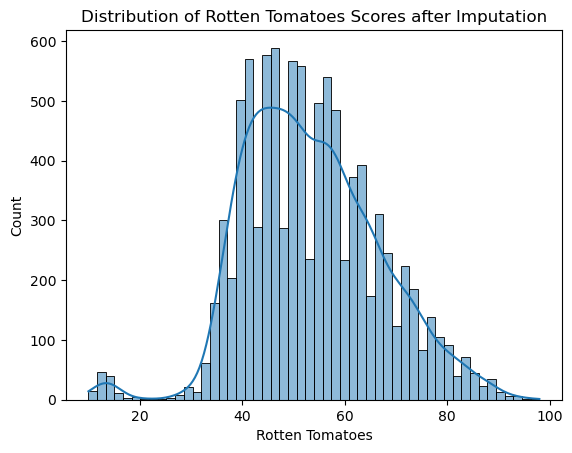

In [123]:
# Visualize the distribution of Rotten Tomatoes scores after imputation
sns.histplot(df['Rotten Tomatoes'], kde=True)
plt.title('Distribution of Rotten Tomatoes Scores after Imputation')
plt.show()

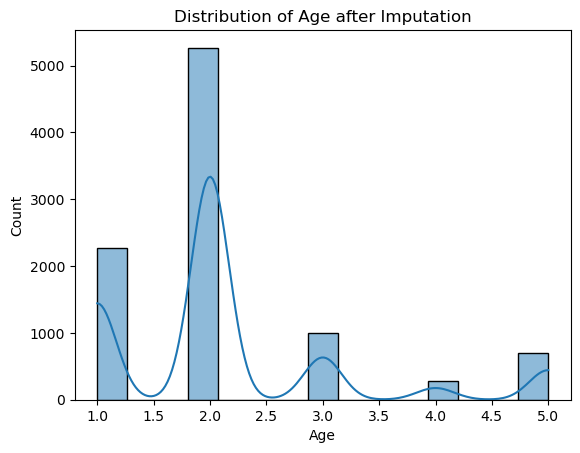

In [124]:
# Visualize the distribution of Age after imputation
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age after Imputation')
plt.show()

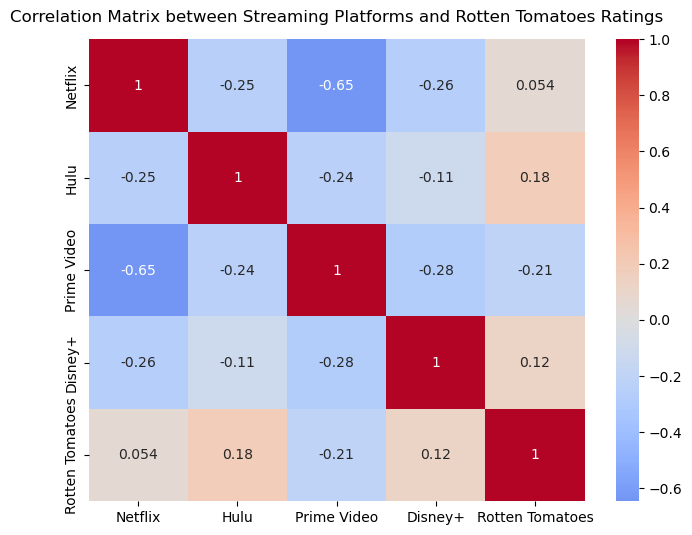

In [125]:
# Visualize correlation between Streaming Platforms and Rotten Tomatoes
# Heatmap
correlation_matrix = df[['Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Rotten Tomatoes']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Streaming Platforms and Rotten Tomatoes Ratings', y=1.02)
plt.show()

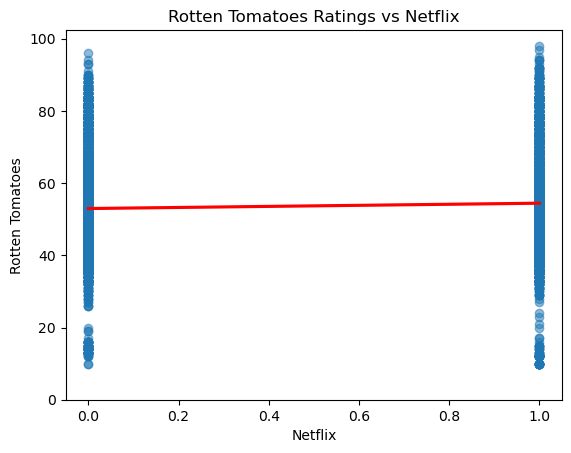

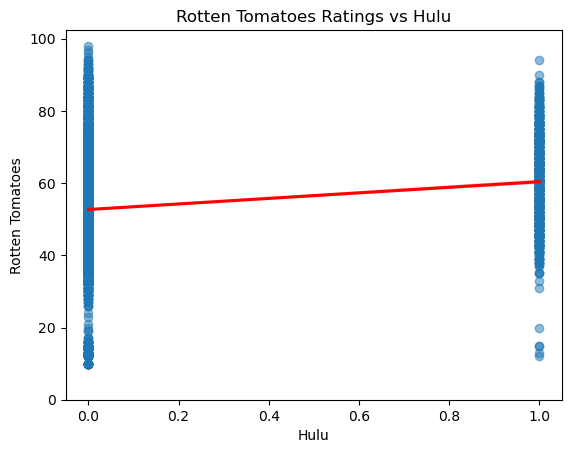

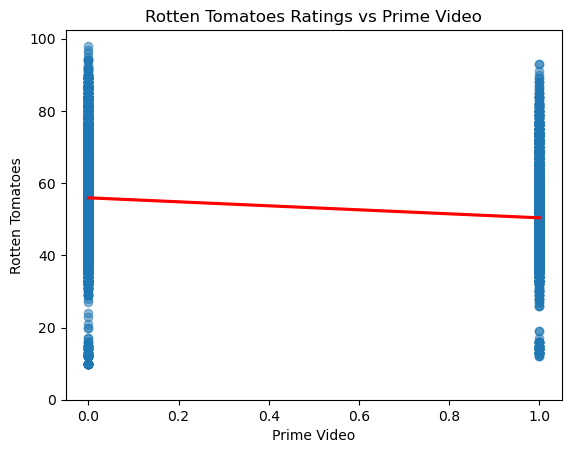

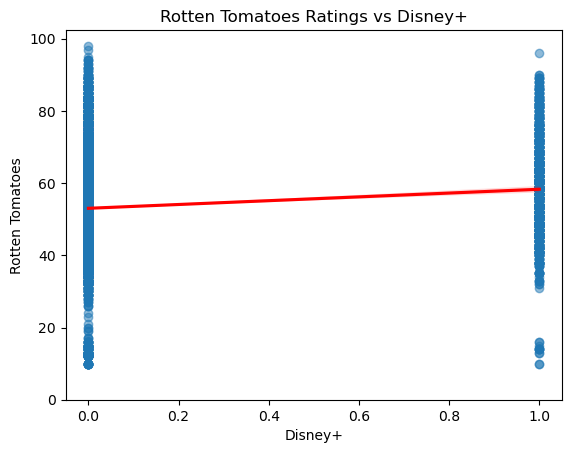

In [126]:
# Visualize correlation between Streaming Platforms and Rotten Tomatoes
# Scatter Plots with Regression Line
features = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
for feature in features:
    sns.regplot(x=feature, y='Rotten Tomatoes', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'Rotten Tomatoes Ratings vs {feature}')
    plt.ylim(0,)
    plt.show()


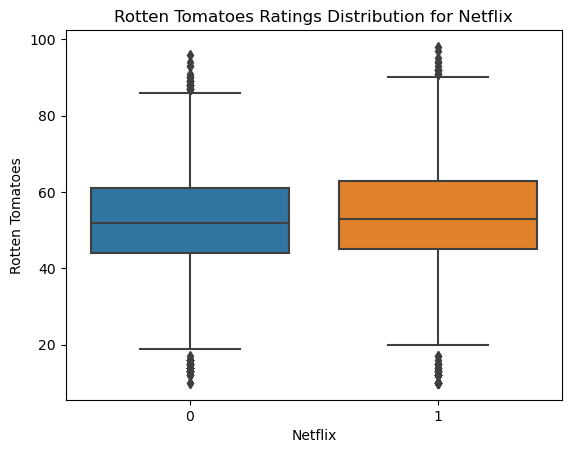

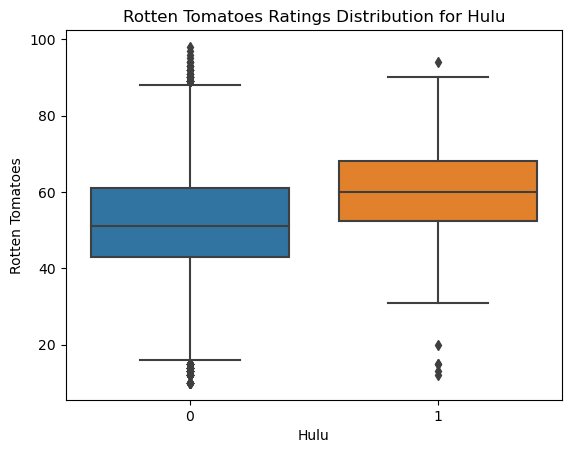

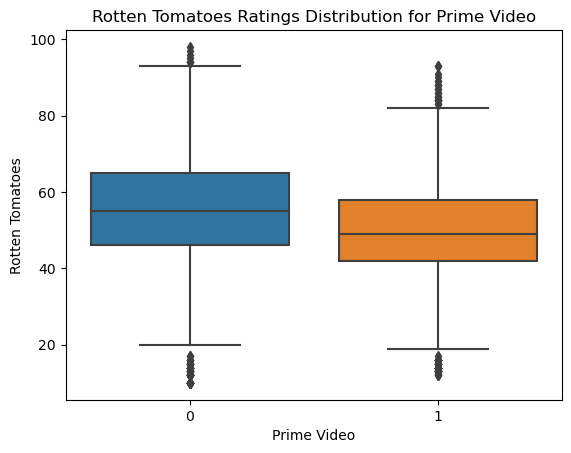

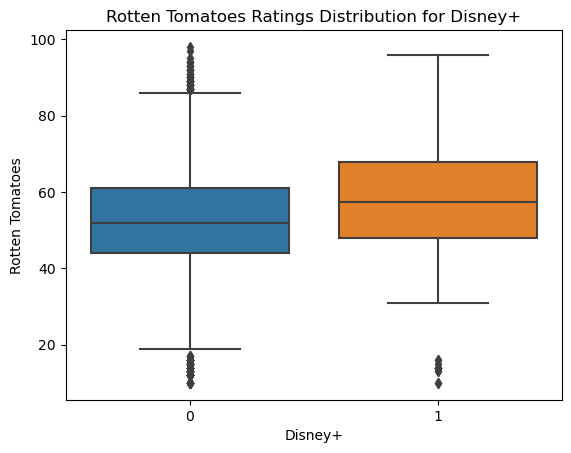

In [127]:
# Visualize correlation between Streaming Platforms and Rotten Tomatoes
# Boxplots
for feature in features:
    sns.boxplot(x=feature, y='Rotten Tomatoes', data=df)
    plt.title(f'Rotten Tomatoes Ratings Distribution for {feature}')
    plt.show()

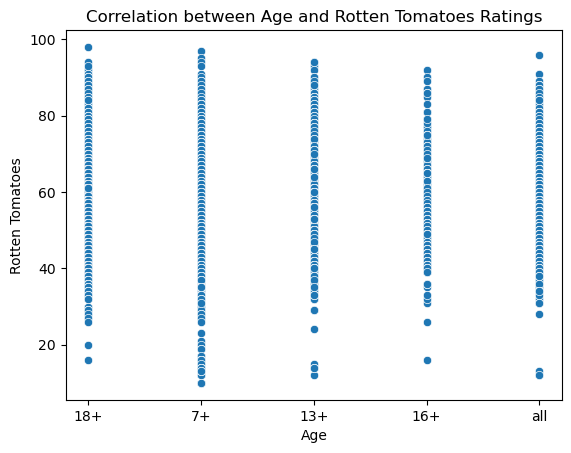

In [128]:
# Visualize correlation between Age and Rotten Tomatoes scores
# Scatterplot
sns.scatterplot(x='Age', y='Rotten Tomatoes', data=df)
plt.title('Correlation between Age and Rotten Tomatoes Ratings')
plt.xticks(ticks=[1, 2, 3, 4, 5], labels=['18+', '7+', '13+', '16+', 'all'])
plt.show()

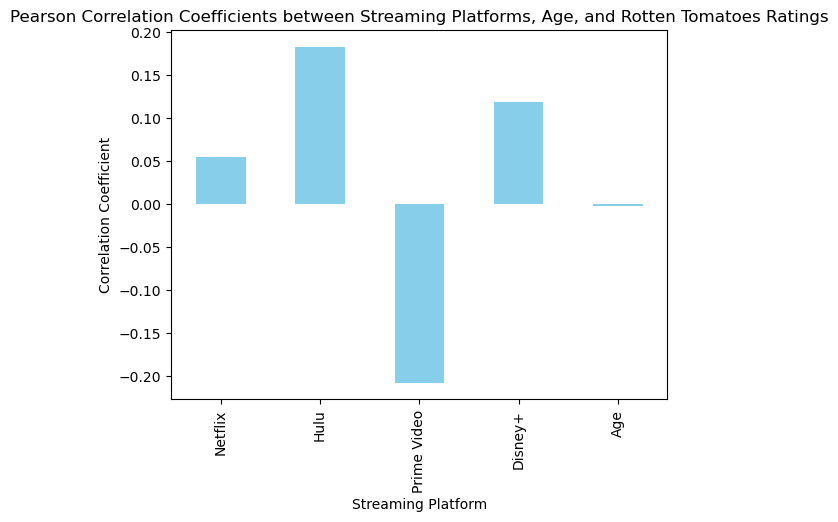

In [129]:
# Correlation Coefficient Plot Streaming Platform
correlations = df[['Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Age', 'Rotten Tomatoes']].corr()['Rotten Tomatoes'].drop('Rotten Tomatoes')
correlations.plot(kind='bar', color='skyblue')
plt.title('Pearson Correlation Coefficients between Streaming Platforms, Age, and Rotten Tomatoes Ratings')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Streaming Platform')
plt.show()

__SUMMARY__

**Mean Squared Error(MSE):** 160.77475670660752


**R-squared:** 0.07771846912213498

**MSE**: The Mean Squared Error indicates the average squared difference between the observed actual outcomes and the outcomes predicted by the model. MSE score: 160.77 suggests that there is a considerable error in the predictions by the model.

**R-squared**: An R-squared value of 0.0777 indicates that approximately 7.77% of the variability in Rotten Tomatoes ratings can be explained by the model using the predictors(Netflix, Hulu, Prime Video, Disney+, Year, and Age). This is a relatively low R-squared value, suggesting that the model does not explain much of variance in Rotten Tomatoes ratings.

**Linear Regression Coefficients**

Netflix: 6.43833637

Hulu: 12.2234454

Prime Video: 2.24492334

Disney+: 11.5013547

Year: -0.000776

Age: -0.575694

**Pearson Correlation Coefficents**

Netflix: 0.054464

Hulu: 0.182635

Prime Video: -0.208128

Disney+: 0.118365

Age: -0.002720

__Conclusion__

__1. Impact Streaming Platforms on Rotten Tomatoes Ratings:__
    
__Hulu and Disney+__: have the most positive impact on Rotten Tomatoes ratings based on the linear coefficients, suggesting that movies available on these platforms tend to have higher ratings
        
__Netflix__: also shows a positive impact, buit it is smaller compared to Hulu and Disney+
        
__Prime Video__: also has a postive impact based on the regressioon coefficient, but its Pearson correlation is negative. This might suggest that the relationship is more complex and could be influenced by other factors not accounted for in the simple correlation

__2. Age Categories and Rotten Tomatoes Ratings:__

The age rating of a movie has a very weak negative correlation with Rotten Tomatoes ratings according to the linear regression coefficient and Pearson correlation. This suggests that age rating does not significantly influence movie ratings on Rotten Tomatoes.

__3. Year and Rotten Tomatoes Ratings:__

The year of the movie release almost have no impact on Rotten Tomatoes ratings, as indicated by the very small negative coefficient in the regression model.

__Recommendations__

__Further Analysis with Different Models__: consider exploring more complex models such as polynomial regression to better capture the factors influencing Rotten Tomatoes ratings

__Model Improvement__: based on low Rsquared, it might be better to explore different types of models, such as decision trees which can capture more complex relationship in the data 

__DEVELOP NEW MODEL USING POLYNOMIAL REGRESSION__

In [130]:
# Prepare data for regression
X = df[['Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Year', 'Age']]
y = df['Rotten Tomatoes']

In [131]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [132]:
# Transform features for polynomial regression
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [133]:
# Fit polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Make predictions
y_pred_poly = poly_reg.predict(X_test_poly)


In [134]:
# Evaluate the polynomial regression model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Polynomial Regression Mean Squared Error: {mse_poly}')
print(f'Polynomial Regression R-squared: {r2_poly}')

Polynomial Regression Mean Squared Error: 152.30834892620283
Polynomial Regression R-squared: 0.12628586669560615


In [135]:
# Print coefficients and their corresponding features
poly_features = poly.get_feature_names_out(X.columns)
coefficients_poly = pd.DataFrame(poly_reg.coef_, poly_features, columns=['Coefficient'])
print(coefficients_poly)

                     Coefficient
Netflix                46.941128
Hulu                  137.134242
Prime Video            17.009024
Disney+               -27.191275
Year                   11.466459
Age                    -0.838091
Netflix^2              46.941128
Netflix Hulu           -5.183390
Netflix Prime Video    -0.693265
Netflix Disney+        -7.209006
Netflix Year           -0.042410
Netflix Age             0.793046
Hulu^2                137.134242
Hulu Prime Video       -4.944729
Hulu Disney+          -13.148347
Hulu Year              -0.129402
Hulu Age                0.747156
Prime Video^2          17.009024
Prime Video Disney+    -6.707797
Prime Video Year       -0.015276
Prime Video Age         0.999882
Disney+^2             -27.191275
Disney+ Year            0.033846
Disney+ Age             0.432969
Year^2                 -0.002885
Year Age               -0.004357
Age^2                   1.432359


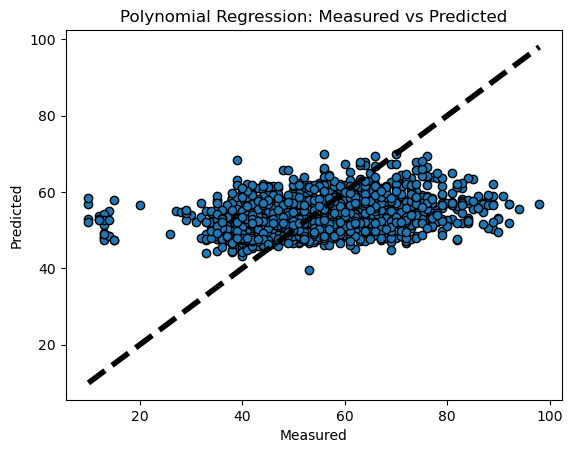

In [136]:
# Visualize the results
plt.scatter(y_test, y_pred_poly, edgecolors=(0, 0, 0))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Polynomial Regression: Measured vs Predicted')
plt.show()

__Polynomial Regression Summary__

__Polynomial Regression MSE:__ 152.30834892620283

__Polynomial Regression R-squared:__ 0.12628586669560615


__MSE:__ Lower than linear regression, indicating better predictions

__R-squared:__ Higher than linear regression, suggesting a better fit

__Conclusion__

Based on the evaluation metrics, the polynomial regression model performs better than the linear regression model

__Recommendations__

1. Consider experiment with higher degree polynomials
2. Try other models like decision trees to capture non-linear relationships and interactions more effectively.

In [147]:
# Try a higher degree polynomial
poly = PolynomialFeatures(degree=5)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)


In [148]:
# Fit the model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Evaluate the model using cross-validation
scores = cross_val_score(model, X_poly_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -np.mean(scores)

print(f'Mean Cross-Validation MSE: {mean_cv_mse}')


Mean Cross-Validation MSE: 11153.622429531844


In [149]:
# Predict and evaluate on test set
y_pred = model.predict(X_poly_test)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f'Test MSE: {test_mse}')
print(f'Test R²: {test_r2}')

Test MSE: 9972.364474547698
Test R²: -56.20629135108431


__Summary of Higher Polynomial Regression__:

A negative R-squared value(-56.20629135108431) and high MSE(9972.364474547698) are strong indicators of overfitting, especially for a polynomial regression model with a high degree.
Overfitting occurs when the model captures noise and outliers in the training data rather than the underlying pattern.

__Next Steps__:

- Consider reducing the degree of the polynomial
- Use regularization techniques such as Ridge regression to penalize large coefficients and reduce overfitting
- Implement cross validation to better evaluate the model's performance on different subsets of the data. This can help in understanding how well the model generalizes to unseen data 

In [151]:
# Try to use a lower degree polyniomial and implement the ridge regression
from sklearn.pipeline import make_pipeline
model = make_pipeline(PolynomialFeatures(degree=3), Ridge())

In [152]:
# Define the hyperparameters to tune
param_grid = {
    'ridge__alpha': [0.1, 1.0, 10.0, 100.0],
    'polynomialfeatures__degree': [2, 3, 4]
}

In [154]:
# Perform Grid Search to find the best hyperparameters
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

C:\Users\Laras\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.84013e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Laras\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.71199e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Laras\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.37887e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Laras\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.84744e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Laras\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:21

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=3)),
                                       ('ridge', Ridge())]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'ridge__alpha': [0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

In [155]:
# Best model after Grid Search
best_model = grid_search.best_estimator_

In [156]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Test MSE: {test_mse}')
print(f'Test R²: {test_r2}')

Best Hyperparameters: {'polynomialfeatures__degree': 3, 'ridge__alpha': 100.0}
Test MSE: 144.34198263287874
Test R²: 0.17198478517662408


__Summary of lower polynomial degree__

- Test MSE (Mean Squared Error): 144.34. This lower value compare to higher degree polynomial(in this case 5) indicates better model performance in terms of prediction accuracy.


- Test R² (R-squared): 0.172. This score indicates that approximately 17.2% of the variance in the target variable is explained by the model on the test set. n this case, the model explains a relatively small proportion of the variance, suggesting that it may not be capturing all the underlying patterns in the data.

__Conclusions of Polynomial Regression:__

Despite employing polynomial features of degree 3 and Ridge regularization, the model struggles to capture a significant portion of the variance present in the data. Several factors may contribute to this limitation:

- The relationships within the data may not be fully captured by a polynomial model of degree 3, suggesting a need for more complex modeling techniques or feature engineering.

- It's possible that important features influencing the target variable were not included in the model, leading to incomplete representation of the underlying relationships.

- The dataset may inherently contain a high level of noise or variability, making it challenging to accurately predict the target variable even with sophisticated modeling approaches.